In [1]:
import os
# get all the files in the folder "gm orders"

files = os.listdir("gm orders")

# keep only the ones that end with bin

bin_files = [f for f in files if f.endswith(".bin")]
print(bin_files)

['w10_k10.bin', 'w10_k11.bin', 'w10_k12.bin', 'w10_k13.bin', 'w10_k14.bin', 'w10_k15.bin', 'w10_k3.bin', 'w10_k4.bin', 'w10_k5.bin', 'w10_k6.bin', 'w10_k7.bin', 'w10_k8.bin', 'w10_k9.bin', 'w11_k10.bin', 'w11_k11.bin', 'w11_k12.bin', 'w11_k13.bin', 'w11_k14.bin', 'w11_k15.bin', 'w11_k3.bin', 'w11_k4.bin', 'w11_k5.bin', 'w11_k6.bin', 'w11_k7.bin', 'w11_k8.bin', 'w11_k9.bin', 'w12_k10.bin', 'w12_k11.bin', 'w12_k12.bin', 'w12_k13.bin', 'w12_k14.bin', 'w12_k15.bin', 'w12_k16.bin', 'w12_k3.bin', 'w12_k4.bin', 'w12_k5.bin', 'w12_k6.bin', 'w12_k7.bin', 'w12_k8.bin', 'w12_k9.bin', 'w13_k10.bin', 'w13_k11.bin', 'w13_k12.bin', 'w13_k13.bin', 'w13_k14.bin', 'w13_k15.bin', 'w13_k3.bin', 'w13_k4.bin', 'w13_k5.bin', 'w13_k6.bin', 'w13_k7.bin', 'w13_k8.bin', 'w13_k9.bin', 'w14_k10.bin', 'w14_k11.bin', 'w14_k12.bin', 'w14_k13.bin', 'w14_k14.bin', 'w14_k15.bin', 'w14_k3.bin', 'w14_k4.bin', 'w14_k5.bin', 'w14_k6.bin', 'w14_k7.bin', 'w14_k8.bin', 'w14_k9.bin', 'w15_k10.bin', 'w15_k11.bin', 'w15_k12.bin',

In [2]:
import struct

def load_vector_from_file(filename):
    with open(filename, 'rb') as file:
        # Read the size of the vector (stored as size_t in C++, which is platform-dependent)
        size_data = file.read(struct.calcsize('P'))  
        size = struct.unpack('P', size_data)[0]
        
        # Read the rest of the data as uint64_t values
        vector_data = file.read(size * struct.calcsize('Q')) 
        vector = struct.unpack(f'{size}Q', vector_data)
        
        return list(vector)

In [3]:
# Load them

vectors = []
k_values = []

# Process each file and skip invalid cases
for f in bin_files:
    try:
        # Extract and convert k value to int
        k = int(f.split("_k")[1].split(".")[0])
        # Load vector only if k is valid
        vectors.append(load_vector_from_file("gm orders/" + f))
        k_values.append(k)
    except (ValueError, IndexError):
        # Skip this file if k is not an integer or format is invalid
        continue

print(k_values)


[10, 11, 12, 13, 14, 15, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 3, 4, 5, 6, 7, 8, 9, 12, 8, 9, 15, 8, 8, 8, 10, 11, 12, 13, 2, 3, 4, 5, 6, 7, 8, 9, 12, 15, 10, 11, 12, 13, 14, 15, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 3, 4, 5, 6, 7, 8, 9]


In [4]:
def get_n_uhs(order,k):
    default_value = 2**k
    # check how many elements in the order are not the default value
    n_uhs = sum([1 for x in order if x != default_value])
    return n_uhs


# Calculate the number of UHS for each order
n_uhs = [get_n_uhs(vectors[i], k_values[i]) for i in range(len(vectors))]

print(n_uhs)

[306, 612, 842, 1585, 3170, 6340, 5, 7, 11, 20, 36, 77, 149, 242, 524, 852, 1548, 2958, 5886, 5, 7, 10, 21, 34, 82, 139, 243, 502, 1004, 1809, 2837, 6219, 12438, 5, 7, 15, 22, 36, 81, 140, 259, 513, 975, 1696, 3282, 6037, 5, 7, 14, 22, 38, 74, 145, 278, 504, 967, 1968, 3878, 7756, 5, 7, 16, 23, 33, 64, 126, 282, 516, 856, 1712, 3530, 7060, 5, 8, 14, 22, 36, 67, 124, 1008, 57, 123, 7087, 58, 59, 56, 547, 1095, 2197, 4315, 2, 5, 9, 18, 34, 68, 141, 271, 1008, 7087, 414, 822, 1562, 3196, 6299, 12384, 2, 4, 7, 14, 26, 55, 103, 200, 339, 653, 1284, 2650, 5099, 9997, 2, 4, 7, 13, 24, 48, 87, 178, 299, 598, 1114, 2244, 4488, 8976, 2, 4, 7, 12, 26, 45, 78, 153, 276, 552, 1104, 2208, 4102, 8204, 2, 4, 7, 13, 23, 40, 81, 135, 244, 524, 1048, 2096, 4192, 8384, 4, 7, 13, 23, 44, 72, 137, 331, 444, 1074, 2148, 4296, 8592, 17184, 34368, 5, 7, 10, 21, 41, 79, 130, 225, 531, 830, 1779, 3558, 7116, 5, 7, 10, 19, 41, 79, 151]


In [5]:
# for each order calculate 2^k/k
reference_points = [2**k/k for k in k_values]
print(reference_points)

[102.4, 186.1818181818182, 341.3333333333333, 630.1538461538462, 1170.2857142857142, 2184.5333333333333, 2.6666666666666665, 4.0, 6.4, 10.666666666666666, 18.285714285714285, 32.0, 56.888888888888886, 102.4, 186.1818181818182, 341.3333333333333, 630.1538461538462, 1170.2857142857142, 2184.5333333333333, 2.6666666666666665, 4.0, 6.4, 10.666666666666666, 18.285714285714285, 32.0, 56.888888888888886, 102.4, 186.1818181818182, 341.3333333333333, 630.1538461538462, 1170.2857142857142, 2184.5333333333333, 4096.0, 2.6666666666666665, 4.0, 6.4, 10.666666666666666, 18.285714285714285, 32.0, 56.888888888888886, 102.4, 186.1818181818182, 341.3333333333333, 630.1538461538462, 1170.2857142857142, 2184.5333333333333, 2.6666666666666665, 4.0, 6.4, 10.666666666666666, 18.285714285714285, 32.0, 56.888888888888886, 102.4, 186.1818181818182, 341.3333333333333, 630.1538461538462, 1170.2857142857142, 2184.5333333333333, 2.6666666666666665, 4.0, 6.4, 10.666666666666666, 18.285714285714285, 32.0, 56.88888888

In [6]:
# check which orders are below 3 times the reference point
below_reference = [n_uhs[i] < 3*reference_points[i] for i in range(len(n_uhs))]
print(below_reference)

# print %
print(sum(below_reference)/len(below_reference)*100)


[True, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, False, False, True, True, True, True, True, True, True, True, True, True, True, False, False, True, True, True, True, True, True, True, True, True, True, False, True, True, True, False, False, False, False, True, True, True, True, False, False, False, False, True, False, False, False, False, False, False, False, True, True, True, True, True, False, False, False, False, False, False, False, False, False, True, True, True, True, True, True, True, False, True, False, False, False, False, False, True, True, True, True, True, True, True, True, True, True, False, False, False, False, True, True, True, True, True, True, True, True, True, True, False, Fa

In [7]:
# check with 4*reference point

below_reference = [n_uhs[i] < 4*reference_points[i] for i in range(len(n_uhs))]
print(sum(below_reference)/len(below_reference)*100)

90.86294416243655


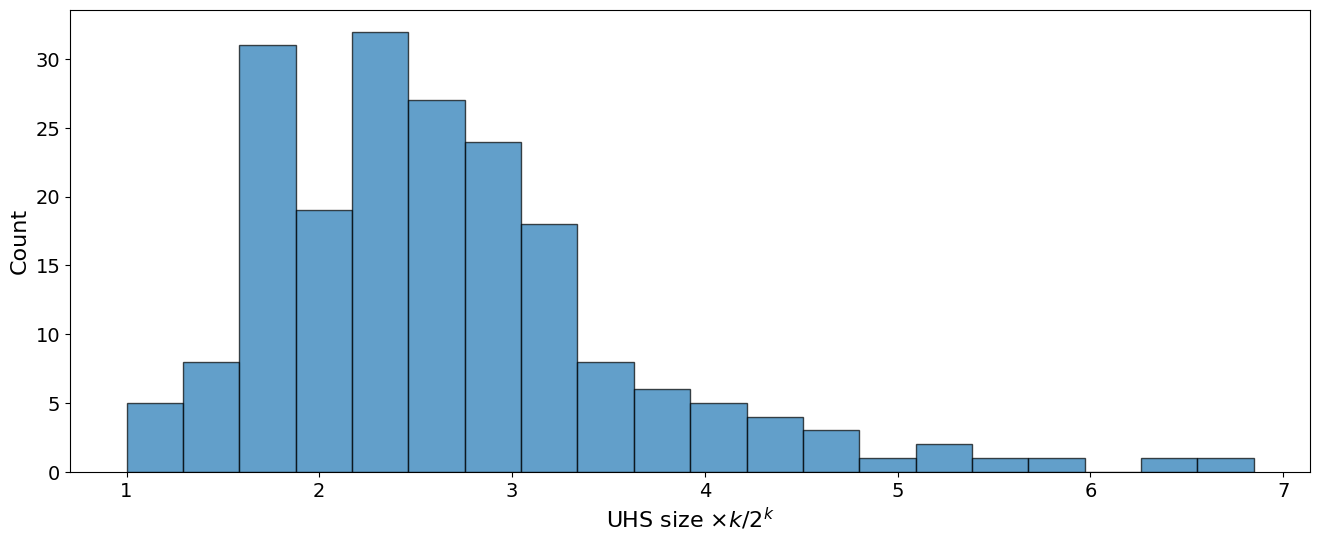

In [31]:
import matplotlib.pyplot as plt

# Normalize UHS sizes
normalized_uhs = [n_uhs[i] / reference_points[i] for i in range(len(n_uhs))]

# Create the histogram
plt.figure(figsize=(16, 6))
plt.hist(normalized_uhs, bins=20, edgecolor='black', alpha=0.7)
plt.xlabel(r"UHS size $\times k/2^k$", fontsize=16)

plt.ylabel("Count", fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.grid(axis='y', linestyle='--', alpha=0.7)


#plt.savefig("histogram.pdf")
plt.savefig("histogram.svg")


plt.show()


In [9]:
# get the average of the normalized uhs
average = sum(normalized_uhs)/len(normalized_uhs)
print(average)

2.679154449307979


In [10]:
# check how many of the normalized uhs are below 3
below_reference = [uhs < 4 for uhs in normalized_uhs]
print(sum(below_reference)/len(below_reference)*100)


90.86294416243655
